In [36]:
'''
Created on Mar 17, 2017

@author: ashutosh
'''
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import numpy as np
#simple moving average
def sma(prices, period):
    num_prices = len(prices)

    if num_prices < period:
        # show error message
        raise SystemExit('Error: num_prices < period')

    sma_range = num_prices - period + 1

    smas = np.zeros(sma_range)

    # only required for the commented code below
    #k = period

    for idx in range(sma_range):
        # this is the code, but using np.mean below is faster and simpler
        #for period_num in range(period):
        #    smas[idx] += prices[idx + period_num]
        #smas[idx] /= k

        smas[idx] = np.mean(prices[idx:idx + period])

    return smas


if __name__=="__main__": 
    mydata=pd.read_csv("SBIN.csv")
    prices=np.array(mydata['Close'])

    sma=sma(prices,20)
    print (sma)
    

[ 290.015   291.105   291.9275 ...,  256.1725  257.7825  259.34  ]


In [37]:
len(mydata)

4711

In [38]:
type(sma)

numpy.ndarray

In [39]:
len(sma)

4692

In [40]:
print (sma)

[ 290.015   291.105   291.9275 ...,  256.1725  257.7825  259.34  ]


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates
mydata=pd.read_csv("SBIN.csv")
mydata_x=mydata['Open'].values
mydata_y=mydata['Close'].values
avr=(mydata_x+mydata_y)/2

avr=avr[19:]
print (avr)


[ 297.075  297.8    299.2   ...,  272.575  275.275  278.525]


In [44]:
len(avr)

4692

4653

In [45]:
type(avr)


numpy.ndarray

In [46]:
#splitting the data into two sets training and testing dataset
stock_x_train=avr[:-20]
stock_x_test=avr[-20:]

In [47]:
#splitting the target into training and testing dataset
stock_y_train=sma[:-20]
stock_y_test=sma[-20:]

In [48]:
from sklearn import linear_model
import pandas as pd
import matplotlib.dates as mdates


In [49]:
#creating the linear regression object
regr=linear_model.LinearRegression()
#reshaping to remove depreciation error
stock_x_train=stock_x_train.reshape(-1,1)
stock_y_train=stock_y_train.reshape(-1,1)

In [50]:
regr.fit(stock_x_train,stock_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
print("Coefficient is ",regr.coef_)

Coefficient is  [[ 0.98547162]]


In [52]:
stock_x_test=stock_x_test.reshape(-1,1)
stock_y_test=stock_y_test.reshape(-1,1)

In [53]:
#mean square error, it should be closer to zero for a good condition
print("Mean squared error: %.2f" % np.mean((regr.predict(stock_x_test) - stock_y_test) ** 2))

Mean squared error: 362.35


In [54]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(stock_x_test, stock_y_test))

Variance score: -39.31


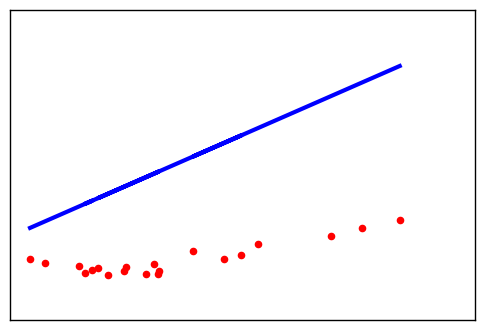

In [55]:
#plotting the output
plt.scatter(stock_x_test, stock_y_test, color='red')
plt.plot(stock_x_test,regr.predict(stock_x_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()